Step 1: Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('D:\\Machine Learning Dataset\\diabetes.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 

Step 2: Data cleaning and Preprocessing

In [2]:
# Check for zero values that might represent missing data
# In medical datasets, zero values for certain features might be biologically impossible
print("Zero values in each column:")
print((df == 0).sum())

# Handle zero values in features where zero is not biologically plausible
# For Glucose, BloodPressure, SkinThickness, Insulin, BMI - zero might indicate missing data
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN for these columns
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

# Check missing values after replacement
print("\nMissing values after zero replacement:")
print(df.isnull().sum())

# Impute missing values using median
imputer = SimpleImputer(strategy='median')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify no more missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())

Zero values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Missing values after zero replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Step 3: Feature Engineering and Data Preparation

In [3]:
# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in test set: {np.bincount(y_test)}")

Training set size: (614, 8)
Test set size: (154, 8)
Class distribution in training set: [400 214]
Class distribution in test set: [100  54]


Step 4: Model Training

In [4]:
# Initialize and train the model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on test set
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9495
Test Accuracy: 0.7403


Step 5: Model Evaluation


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154


=== Confusion Matrix (Test Set) ===
[[85 15]
 [25 29]]


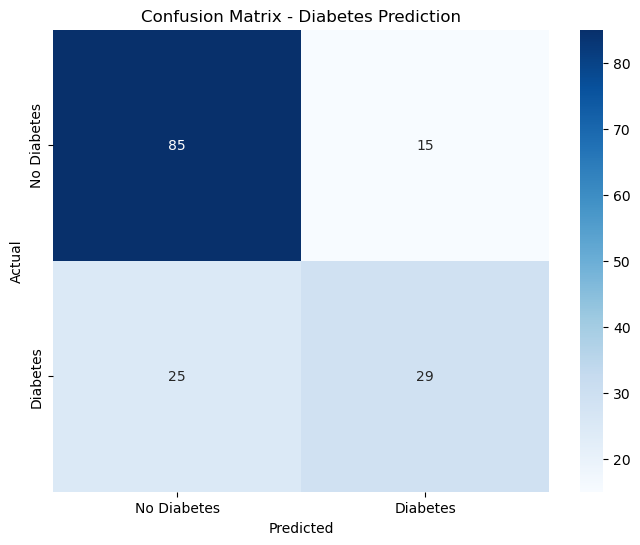


=== Feature Importance ===
                    feature  importance
1                   Glucose    0.316495
5                       BMI    0.176100
7                       Age    0.113591
6  DiabetesPedigreeFunction    0.112421
4                   Insulin    0.079405
0               Pregnancies    0.071121
2             BloodPressure    0.069533
3             SkinThickness    0.061333


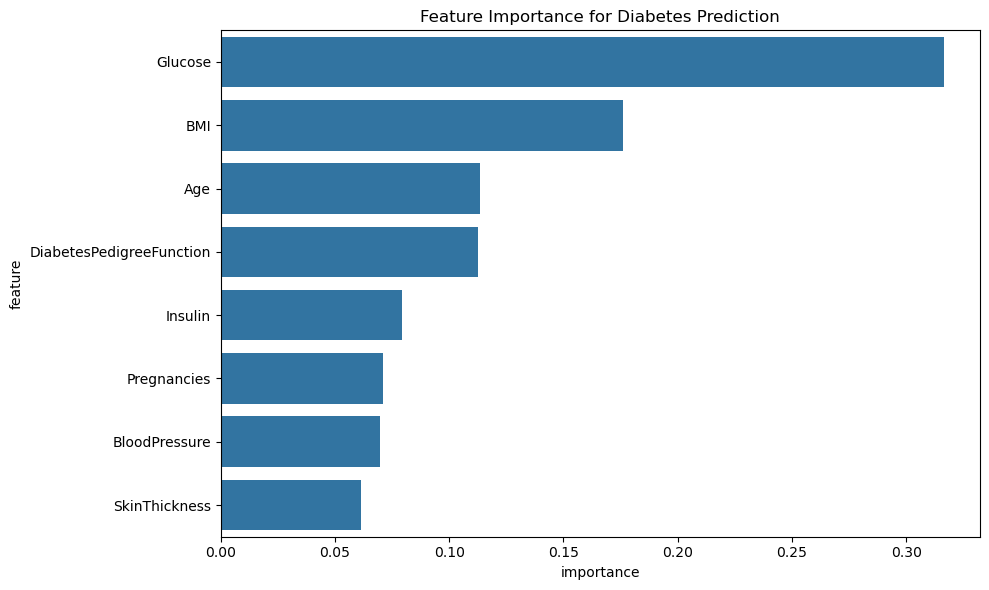

In [5]:
# Detailed evaluation
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_test_pred))

print("\n=== Confusion Matrix (Test Set) ===")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Diabetes Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importance ===")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Diabetes Prediction')
plt.tight_layout()
plt.show()

Step 6: Model Testing on New Patient Data

In [8]:
def predict_diabetes_risk(new_patient_data, model, scaler, feature_names):
    """
    Predict diabetes risk for new patient data
    
    Parameters:
    - new_patient_data: List or array of patient features in order:
      [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, 
       BMI, DiabetesPedigreeFunction, Age]
    - model: Trained machine learning model
    - scaler: Fitted StandardScaler
    - feature_names: List of feature names
    
    Returns:
    - Prediction (0: No Diabetes, 1: Diabetes)
    - Probability of diabetes
    """
    
    # Convert to DataFrame
    new_df = pd.DataFrame([new_patient_data], columns=feature_names)
    
    # Scale the features
    new_scaled = scaler.transform(new_df)
    
    # Make prediction
    prediction = model.predict(new_scaled)[0]
    probability = model.predict_proba(new_scaled)[0][1]
    
    return prediction, probability

# Example: Test with new patient data
feature_names = X.columns.tolist()

# Example patient data
new_patients = [
    # Patient 1: High risk example
    [2, 180, 85, 35, 200, 35.5, 0.8, 45],
    # Patient 2: Low risk example  
    [1, 90, 70, 25, 80, 24.0, 0.3, 25],
    # Patient 3: Moderate risk
    [3, 140, 80, 30, 150, 32.0, 0.5, 35]
]

print("=== Diabetes Risk Prediction for New Patients ===")
for i, patient in enumerate(new_patients, 1):
    prediction, probability = predict_diabetes_risk(patient, model, scaler, feature_names)
    risk_level = "High Risk" if prediction == 1 else "Low Risk"
    
    print(f"\nPatient {i}:")
    print(f"  Prediction: {risk_level}")
    print(f"  Diabetes Probability: {probability:.4f} ({probability*100:.2f}%)")
    print(f"  Features: Glucose={patient[1]}, BMI={patient[5]}, Age={patient[7]}")

=== Diabetes Risk Prediction for New Patients ===

Patient 1:
  Prediction: High Risk
  Diabetes Probability: 0.8767 (87.67%)
  Features: Glucose=180, BMI=35.5, Age=45

Patient 2:
  Prediction: Low Risk
  Diabetes Probability: 0.0152 (1.52%)
  Features: Glucose=90, BMI=24.0, Age=25

Patient 3:
  Prediction: High Risk
  Diabetes Probability: 0.5387 (53.87%)
  Features: Glucose=140, BMI=32.0, Age=35


Step 7: Complete Diabetes Prediction System

In [9]:
class DiabetesPredictor:
    def __init__(self, model, scaler, feature_names):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names
    
    def predict_single_patient(self, patient_data):
        """Predict for a single patient"""
        prediction, probability = predict_diabetes_risk(
            patient_data, self.model, self.scaler, self.feature_names
        )
        return {
            'prediction': prediction,
            'probability': probability,
            'risk_level': 'Diabetes Risk' if prediction == 1 else 'No Diabetes Risk'
        }
    
    def predict_multiple_patients(self, patients_data):
        """Predict for multiple patients"""
        results = []
        for patient in patients_data:
            result = self.predict_single_patient(patient)
            results.append(result)
        return results

# Initialize the predictor system
diabetes_predictor = DiabetesPredictor(model, scaler, feature_names)

# Test the system
print("=== Diabetes Prediction System ===")
test_results = diabetes_predictor.predict_multiple_patients(new_patients)

for i, result in enumerate(test_results, 1):
    print(f"\nPatient {i} Result:")
    print(f"  Risk Level: {result['risk_level']}")
    print(f"  Confidence: {result['probability']:.4f}")

=== Diabetes Prediction System ===

Patient 1 Result:
  Risk Level: Diabetes Risk
  Confidence: 0.8767

Patient 2 Result:
  Risk Level: No Diabetes Risk
  Confidence: 0.0152

Patient 3 Result:
  Risk Level: Diabetes Risk
  Confidence: 0.5387


Step 8: Model Performance Summary

In [10]:
# Final performance summary
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate additional metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print("=== Final Model Performance Summary ===")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

# Save the model for future use
import joblib

# Save model and scaler
joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_names, 'feature_names.pkl')

print("\nModel saved successfully for future use!")

=== Final Model Performance Summary ===
Accuracy:  0.7403
Precision: 0.6591
Recall:    0.5370
F1-Score:  0.5918
ROC-AUC:   0.8085

Model saved successfully for future use!
